In [1]:
using ViscousFlow

In [2]:
using Plots
pyplot()
clibrary(:colorbrewer)
default(grid = false)

┌ Info: Recompiling stale cache file /Users/jeff/.julia/compiled/v1.1/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1184


### Testing field types and operators

In [3]:
i = 5; j = 5;

In [4]:
nx = 12; ny = 12;

In [5]:
w = Nodes(Dual,(5,4))
w .= reshape(1:20,5,4)
w∘w
C = Curl()
D = Divergence()
D*(C*w)

Nodes{Primal,5,4} data
Printing in grid orientation (lower left is (1,1))
3×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [6]:
w = Nodes(Dual,(12,12));
w[4,4] = 1.0;
q = Edges(Primal,w)
curl!(q,w)

Edges{Primal,12,12} data
u (in grid orientation)
11×12 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
v (in grid orientation)
12×11 Array{Float64,2}:
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0

In [7]:
q = Edges(Dual,(8,6));
p = deepcopy(q);
q.u[3,2] = 0.3;
p.u[3,2] = 0.2;
p∘q

Edges{Dual,8,6} data
u (in grid orientation)
6×7 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
 0.0  0.0  0.06  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0
v (in grid orientation)
5×8 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [8]:
q = Edges{Dual, 5, 4}()
q.u .= reshape(1:16, 4, 4)
q.v .= reshape(1:15, 5, 3)
v = Edges{Primal, 5, 4}()
Fields.cellshift!(v,q)
v.v

4×4 Array{Float64,2}:
 0.0  4.0   9.0  0.0
 0.0  5.0  10.0  0.0
 0.0  6.0  11.0  0.0
 0.0  7.0  12.0  0.0

In [9]:
nx = 250; ny = 250;
i = 40; j = 50;
w = Nodes(Dual,(nx,ny))
w[i,j] = 1.0
E = plan_intfact(5,w)
E25 = plan_intfact(2.5,w)

Integrating factor with parameter 2.5 on a (nx = 250, ny = 250) grid

In [10]:
E25*(E25*w)≈E*w

true

In [11]:
@time E*w;

  0.002936 seconds (7 allocations: 488.563 KiB)


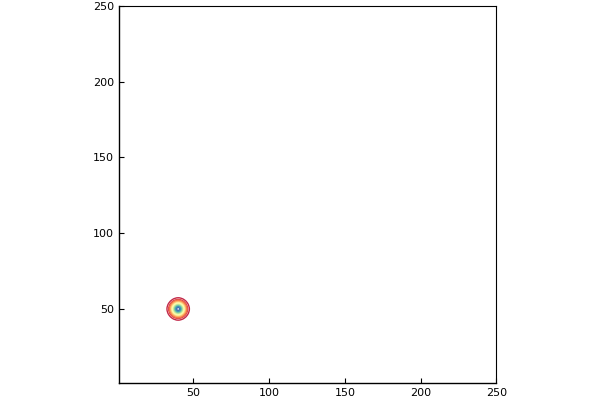

In [12]:
plot(E*w)

In [13]:
cellzero = Nodes(Dual,(nx,ny))
nodezero = Nodes(Primal,cellzero)
facezero = Edges(Primal,cellzero)
dualfacezero = Edges(Dual,cellzero)

cellunit = deepcopy(cellzero)
cellunit[i,j] = 1.0

1.0

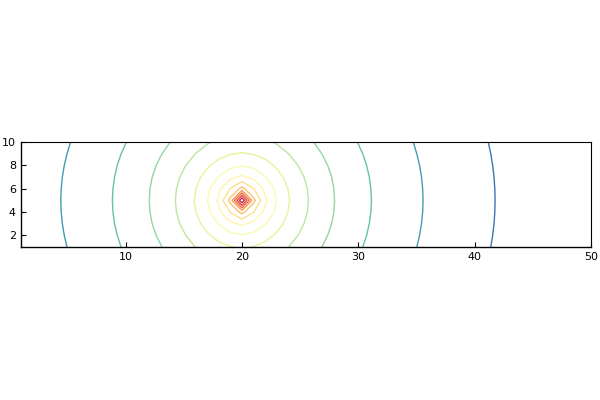

In [14]:
w = Nodes(Dual,(50,10));
w[20,5] = 1.0
L = plan_laplacian(w,with_inverse=true)
plot(L\w)

In [15]:
laplacian(L\w)

Nodes{Dual,50,10} data
Printing in grid orientation (lower left is (1,1))
10×50 Array{Float64,2}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0   0.0          -3.33067e-16      3.33067e-16   1.11022e-15  0.0
 0.0   1.66533e-15  -2.22045e-16     -8.88178e-16  -1.11022e-16  0.0
 0.0  -1.11022e-16  -1.11022e-15      1.11022e-15  -1.44329e-15  0.0
 0.0   1.44329e-15  -5.55112e-16      0.0           1.22125e-15  0.0
 0.0  -4.44089e-16  -1.22125e-15  …  -7.77156e-16  -9.99201e-16  0.0
 0.0   1.44329e-15  -3.33067e-16      1.11022e-16   1.44329e-15  0.0
 0.0  -2.22045e-16  -6.66134e-16      3.33067e-16  -1.77636e-15  0.0
 0.0   1.66533e-15  -2.22045e-16     -7.77156e-16  -1.11022e-16  0.0
 0.0   0.0           0.0              0.0           0.0          0.0

In [16]:
E = plan_intfact(1.0,(nx,ny))

Integrating factor with parameter 1.0 on a (nx = 250, ny = 250) grid

In [17]:
E! = plan_intfact!(1.0,(nx,ny))

In-place integrating factor with parameter 1.0 on a (nx = 250, ny = 250) grid

In [18]:
w = deepcopy(cellunit)

Nodes{Dual,250,250} data
Printing in grid orientation (lower left is (1,1))
250×250 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 

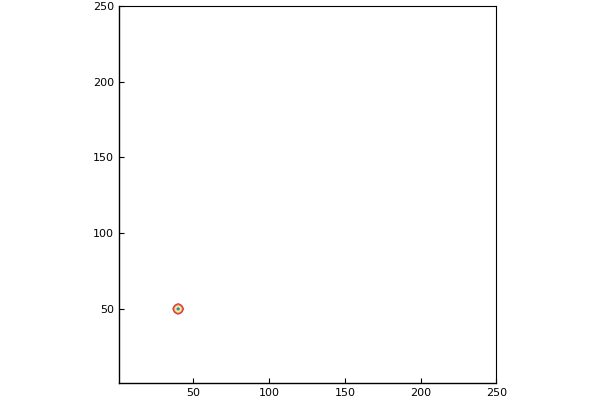

In [19]:
plot(E!*w)

In [20]:
C = Curl()
C*w

Edges{Primal,250,250} data
u (in grid orientation)
249×250 Array{Float64,2}:
 -1.2982e-19   -4.25914e-19  -5.76634e-19  …   4.06862e-19   4.11267e-19
 -2.14748e-19  -2.62859e-20   1.8976e-19      -3.55572e-19  -3.92293e-19
 -1.02425e-19  -1.60016e-21   3.19069e-20     -5.04038e-21   8.87857e-20
 -2.48871e-20  -3.67976e-20  -6.75932e-20     -8.69576e-20  -8.9441e-20 
  1.23653e-19   1.16495e-19   9.12288e-20     -2.86131e-20  -7.32539e-20
  6.0425e-20    5.57571e-20   3.24559e-20  …   9.24512e-20   9.54643e-20
 -2.21608e-20  -1.98799e-20  -6.1693e-21       6.83908e-20   5.17228e-20
 -6.11708e-20  -6.56905e-20  -3.10291e-20     -1.56076e-19  -1.6233e-19 
  8.03874e-20   8.29694e-20   3.61907e-20      5.6343e-21    1.67023e-20
 -7.44393e-20  -3.15623e-20   4.53056e-20      8.8109e-20    3.06119e-20
  7.50733e-20   3.61758e-20  -6.58066e-20  …   1.03421e-19   2.09663e-19
 -2.87639e-20  -5.36255e-20  -5.1137e-20       9.71387e-20   6.0215e-20 
 -1.40742e-19  -1.58066e-19  -1.49528e-19     -

In [21]:
Nodes(Primal,cellunit)

Nodes{Primal,250,250} data
Printing in grid orientation (lower left is (1,1))
249×249 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [22]:
w = Fields.Nodes{Fields.Dual, 5, 4}()
w .= reshape(1:20, 5, 4)
Ww = Fields.cellshift(w)

Edges{Dual,5,4} data
u (in grid orientation)
4×4 Array{Float64,2}:
  0.0   0.0   0.0   0.0
 11.5  12.5  13.5  14.5
  6.5   7.5   8.5   9.5
  0.0   0.0   0.0   0.0
v (in grid orientation)
3×5 Array{Float64,2}:
 0.0  14.5  15.5  16.5  0.0
 0.0   9.5  10.5  11.5  0.0
 0.0   4.5   5.5   6.5  0.0

In [23]:
s = Fields.Nodes{Fields.Dual, 5, 4}()
s .= rand(5, 4)
Fields.divergence(Fields.curl(s))

Nodes{Primal,5,4} data
Printing in grid orientation (lower left is (1,1))
3×4 Array{Float64,2}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [24]:
v = Fields.Nodes(Fields.Dual,(12,12))
v[4,5] = 1.0
v

Nodes{Dual,12,12} data
Printing in grid orientation (lower left is (1,1))
12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [25]:
faceones = deepcopy(facezero)
fill!(faceones,1.0)

Edges{Primal,250,250} data
u (in grid orientation)
249×250 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1

In [26]:
w = Fields.Nodes(Fields.Primal,v)
w[4,5] = 1.0
Fields.grad(w)

Edges{Primal,12,12} data
u (in grid orientation)
11×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
v (in grid orientation)
12×11 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0

In [27]:
q = Fields.Edges(Fields.Dual,v)
q.u[4,5] = 1.0
dq = Fields.grad(q)
dq.dudy

Nodes{Primal,12,12} data
Printing in grid orientation (lower left is (1,1))
11×11 Array{Float64,2}:
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  -1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

#### Testing the inverse Laplacian

In [28]:
L = plan_laplacian(nx,ny;with_inverse=true)

Discrete Laplacian (and inverse) on a (nx = 250, ny = 250) grid with spacing 1.0

In [33]:
@time L\cellunit

  0.003911 seconds (7 allocations: 488.563 KiB)


Nodes{Dual,250,250} data
Printing in grid orientation (lower left is (1,1))
250×250 Array{Float64,2}:
 0.846223  0.846075  0.845931  0.845791  …  0.901595  0.901992  0.90239 
 0.845455  0.845305  0.84516   0.845018     0.901212  0.901612  0.902011
 0.844683  0.844532  0.844385  0.844242     0.90083   0.901232  0.901633
 0.843907  0.843755  0.843606  0.843462     0.900448  0.900852  0.901255
 0.843128  0.842974  0.842824  0.842678     0.900066  0.900472  0.900877
 0.842345  0.84219   0.842038  0.841891  …  0.899684  0.900092  0.900499
 0.841558  0.841401  0.841249  0.8411       0.899303  0.899712  0.900121
 0.840768  0.84061   0.840455  0.840305     0.898921  0.899332  0.899743
 0.839974  0.839814  0.839658  0.839506     0.89854   0.898953  0.899366
 0.839176  0.839014  0.838857  0.838703     0.898158  0.898573  0.898988
 0.838374  0.838211  0.838052  0.837896  …  0.897777  0.898194  0.898611
 0.837568  0.837403  0.837242  0.837086     0.897396  0.897815  0.898234
 0.836758  0.836592  0

In [34]:
cellunit_out = L*(L\cellunit) 

Nodes{Dual,250,250} data
Printing in grid orientation (lower left is (1,1))
250×250 Array{Float64,2}:
 0.0   0.0           0.0          …   0.0           0.0          0.0
 0.0  -1.33227e-15  -4.44089e-16     -1.33227e-15   3.10862e-15  0.0
 0.0   1.55431e-15   6.66134e-16      3.77476e-15   4.44089e-16  0.0
 0.0  -3.10862e-15  -2.22045e-16     -3.77476e-15  -1.9984e-15   0.0
 0.0   3.33067e-15   2.22045e-16      2.88658e-15   8.88178e-16  0.0
 0.0  -1.11022e-15   0.0          …  -1.33227e-15  -6.66134e-16  0.0
 0.0  -2.22045e-16  -1.33227e-15      1.9984e-15   -4.44089e-16  0.0
 0.0   2.44249e-15   1.11022e-15      6.66134e-16  -2.22045e-16  0.0
 0.0  -1.33227e-15  -1.55431e-15     -6.66134e-16   1.33227e-15  0.0
 0.0   2.22045e-16   8.88178e-16      1.77636e-15  -2.44249e-15  0.0
 0.0  -4.44089e-16  -3.10862e-15  …  -2.66454e-15  -2.22045e-16  0.0
 0.0   1.77636e-15   4.21885e-15      2.22045e-15   2.88658e-15  0.0
 0.0  -1.77636e-15  -1.55431e-15      8.88178e-16  -2.44249e-15  0.0
 

In [35]:
findmax(cellunit_out)

(0.9999999999999998, CartesianIndex(40, 50))